In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import rankdata


datapath = "../data"
outpath = "../output"

In [5]:
df = pd.read_csv(os.path.join(outpath, "results", "allpreds.csv"), low_memory=False)

In [6]:
higher = {
    'sarathy2016': True,
    'janardhan2016': True,
    'radchenko2023': True,
    'lepori2025_mtb': True,
    'lepori2025_msm': True,
    'mycpermcheck': True,
    "entry_score": True
}


ranks = {}

for k,v in higher.items():
    if v:
        r = rankdata(df[k], method="min")
        ranks[k] = r/np.max(r)
    else:
        r = rankdata(-df[k], method="min")
        ranks[k] = r/np.max(r)

In [7]:
dr = pd.DataFrame(ranks)
dr = pd.concat([df[["name", "indication"]], dr], axis=1)

def rank_drugs(df):
    columns = list(df.columns)[2:]
    rank = rankdata(np.average(df[columns], axis=1))
    rank = rank/np.max(rank)
    df["rank"] = rank
    return df

dr = rank_drugs(dr)
dr

,name,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,entry_score,rank
0,abacavir,arv,0.580357,0.116071,0.258929,0.991071,0.991071,0.571429,0.590909,0.808036
1,amprenavir,arv,0.303571,0.625000,0.428571,0.544643,0.571429,0.062500,0.100000,0.205357
2,atazanavir,arv,0.071429,0.866071,0.714286,0.562500,0.464286,0.312500,0.009091,0.330357
3,cabotegravir,arv,0.491071,0.919643,0.562500,0.500000,0.357143,0.187500,0.590909,0.602679
4,darunavir,arv,0.196429,0.669643,0.464286,0.616071,0.598214,0.035714,0.009091,0.169643
...,...,...,...,...,...,...,...,...,...,...
107,Sutezolid,mtb,0.651786,0.758929,0.544643,0.883929,0.937500,0.473214,0.590909,0.973214
108,Tedizolid,mtb,0.482143,0.892857,0.625000,0.473214,0.473214,0.071429,0.590909,0.602679
109,Terizidone,mtb,0.517857,0.491071,0.401786,0.160714,0.178571,0.803571,0.590909,0.401786
110,Thioacetazone,mtb,0.750000,0.294643,0.633929,0.696429,0.946429,1.000000,0.590909,0.991071


In [8]:
ds = []
for i in ["mtb", "arv", "coad"]:
    ds_ = dr[dr["indication"] == i]
    ds_ = ds_.sort_values(by="rank", ascending=False)
    ds += [ds_]

In [10]:
ds = pd.concat(ds).reset_index(drop=True)
ds

,name,indication,sarathy2016,janardhan2016,radchenko2023,lepori2025_mtb,lepori2025_msm,mycpermcheck,entry_score,rank
0,Clofazimine,mtb,0.026786,0.812500,0.991071,0.839286,0.803571,0.973214,0.590909,1.000000
1,Thioacetazone,mtb,0.750000,0.294643,0.633929,0.696429,0.946429,1.000000,0.590909,0.991071
2,Sutezolid,mtb,0.651786,0.758929,0.544643,0.883929,0.937500,0.473214,0.590909,0.973214
3,morinamide,mtb,0.892857,0.776786,0.160714,0.830357,0.625000,0.883929,0.590909,0.964286
4,Linezolid,mtb,0.732143,0.830357,0.482143,0.723214,0.821429,0.437500,0.590909,0.955357
...,...,...,...,...,...,...,...,...,...,...
107,Furosemide,coad,0.616071,0.705357,0.357143,0.151786,0.071429,0.151786,0.309091,0.071429
108,Enalapril,coad,0.669643,0.875000,0.250000,0.080357,0.089286,0.232143,0.100000,0.058036
109,Acarbose,coad,0.758929,0.455357,0.089286,0.125000,0.169643,0.598214,0.100000,0.058036
110,Artemether,coad,0.553571,0.500000,0.419643,0.267857,0.044643,0.017857,0.100000,0.035714


In [11]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()
X = np.array(ds[list(ds.columns)[2:-1]])
y = np.zeros(ds.shape[0])
for i, v in enumerate(list(ds["indication"])):
    if v == "mtb":
        y[i] = 1
r = np.array(ds["rank"])
mask = np.logical_and(r < 0.2, y == 1)
clf.fit(X[~mask], y[~mask])

LogisticRegressionCV()

In [12]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [13]:
ds["calib"] = clf.predict_proba(X)[:,1]

/tmp/ipykernel_631565/929252048.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="indication", y="calib", data=ds, order=["arv", "coad", "mtb"], palette=palette, ax=ax)


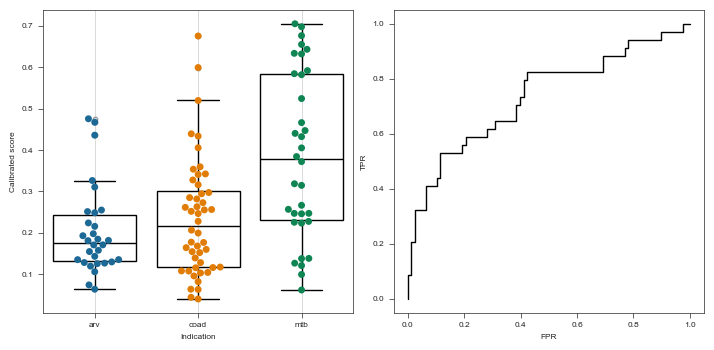

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import stylia
from stylia import NamedColors

colors=NamedColors()

color_dict ={"arv": colors.blue,
             "coad": colors.orange,
             "mtb": colors.green}

palette = {
        "arv": colors.blue,
        "coad": colors.orange,
        "mtb": colors.green
    }

fig, axs = stylia.create_figure(1,2)
ax = axs.next()
sns.swarmplot(x="indication", y="calib", data=ds, order=["arv", "coad", "mtb"], palette=palette, ax=ax)
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
sns.boxplot(x="indication", y="calib", data=ds, order=["arv", "coad", "mtb"], ax=ax, color="white", linewidth=1, **PROPS)
ax.grid()
ax.set_xlabel("Indication")
ax.set_ylabel("Calibrated score")
ax.set_title("")

ax = axs.next()
fpr, tpr, _ = roc_curve(y, list(ds["calib"]))
ax.plot(fpr, tpr, lw=1, color="black")
ax.grid()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("")

plt.tight_layout()

stylia.save_figure(os.path.join(outpath, "plots", "calibration_mtb_likness.png"))

In [15]:
def tail(df, indication, n=10):
    df_ = df[df["indication"] == indication]
    df_ = df_.sort_values(by="calib")
    df_ = df_.drop(columns=["smiles"])
    return df_.head(n).reset_index(drop=True)

def head(df, indication, n=10):
    df_ = df[df["indication"] == indication]
    df_ = df_.sort_values(by="calib", ascending=False)
    df_ = df_.drop(columns=["smiles"])
    return df_.head(n).reset_index(drop=True)

calib = {}
for r in ds[["name", "calib"]].values:
    calib[r[0]] = r[1]
    
calibs = []
for n in list(df["name"]):
    calibs += [calib[n]]

df["calib"] = calibs
df.to_csv(os.path.join(outpath, "results", "mtb_likeness_calibrated_scores.csv"), index=False)

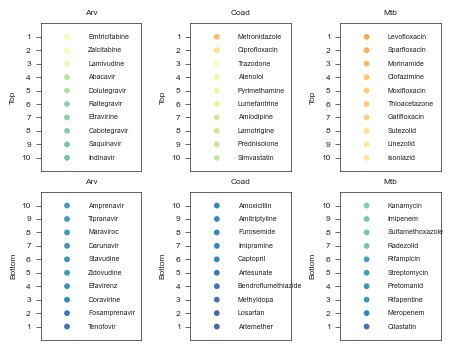

In [19]:
def selection_plot(ax, df, indication, n, is_head):
    if is_head:
        df = head(df, indication, n)
        label = "Top"
        ylim = (10, -1)
    else:
        df = tail(df, indication, n)
        label = "Bottom"
        ylim = (-1, 10)
    df_ = df[df["indication"] == indication][["name", "calib"]]
    values = list(df_["calib"])
    x = [0.6]*len(values)
    y = [i for i in range(len(values))]
    ax.scatter(x, y, c=[-v for v in values], cmap="Spectral", vmin=-1, vmax=0)
    names = list(df_["name"])
    for i, n in enumerate(names):
        ax.text(1, i, n.capitalize(), va="center")
    ax.set_yticks(y)
    ax.set_yticklabels([i+1 for i in y])
    ax.set_xlim(0.1,2)
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_ylabel(label)
    ax.set_xticks([])
    ax.set_title(indication.capitalize())
    ax.set_xlabel("")
    ax.grid(False)
    return ax

fig, axs = stylia.create_figure(2,3, width=stylia.ONE_COLUMN_WIDTH*1.3)

ax = axs.next()
selection_plot(ax, df, "arv", 10, True)

ax = axs.next()
selection_plot(ax, df, "coad", 10, True)
ax = axs.next()
selection_plot(ax, df, "mtb", 10, True)

ax = axs.next()
selection_plot(ax, df, "arv", 10, False)
ax = axs.next()
selection_plot(ax, df, "coad", 10, False)
ax = axs.next()
selection_plot(ax, df, "mtb", 10, False)

plt.tight_layout()

stylia.save_figure(os.path.join(outpath, "plots", "selected_drugs_mtb_likness.png"))